# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [49]:
import numpy as np 
import pandas as pd
df= pd.read_csv("ds_salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [40]:

print("###SHAPE:", df.shape)
print("###INFO:", df.info)
print("###DESCRIBE:", df.describe())


###SHAPE: (3755, 11)
###INFO: <bound method DataFrame.info of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

 

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\software\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


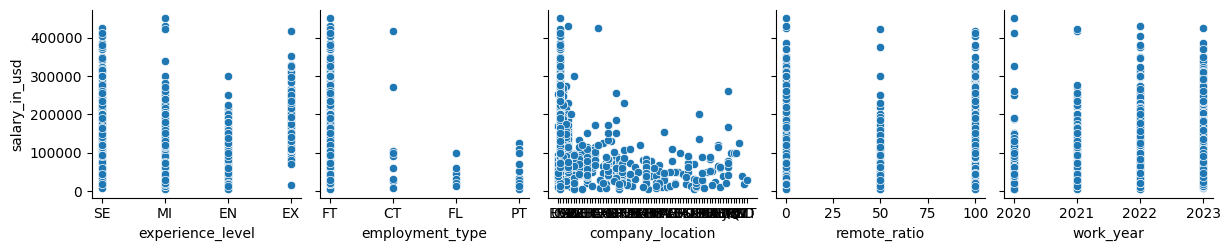

In [43]:
sns.pairplot(df, x_vars=['experience_level', 'employment_type', 'company_location', 'remote_ratio', 'work_year'],
                y_vars='salary_in_usd', aspect=1, kind='scatter')
plt.show()

#Other "kind" values
    #kde
    #hist
    #reg



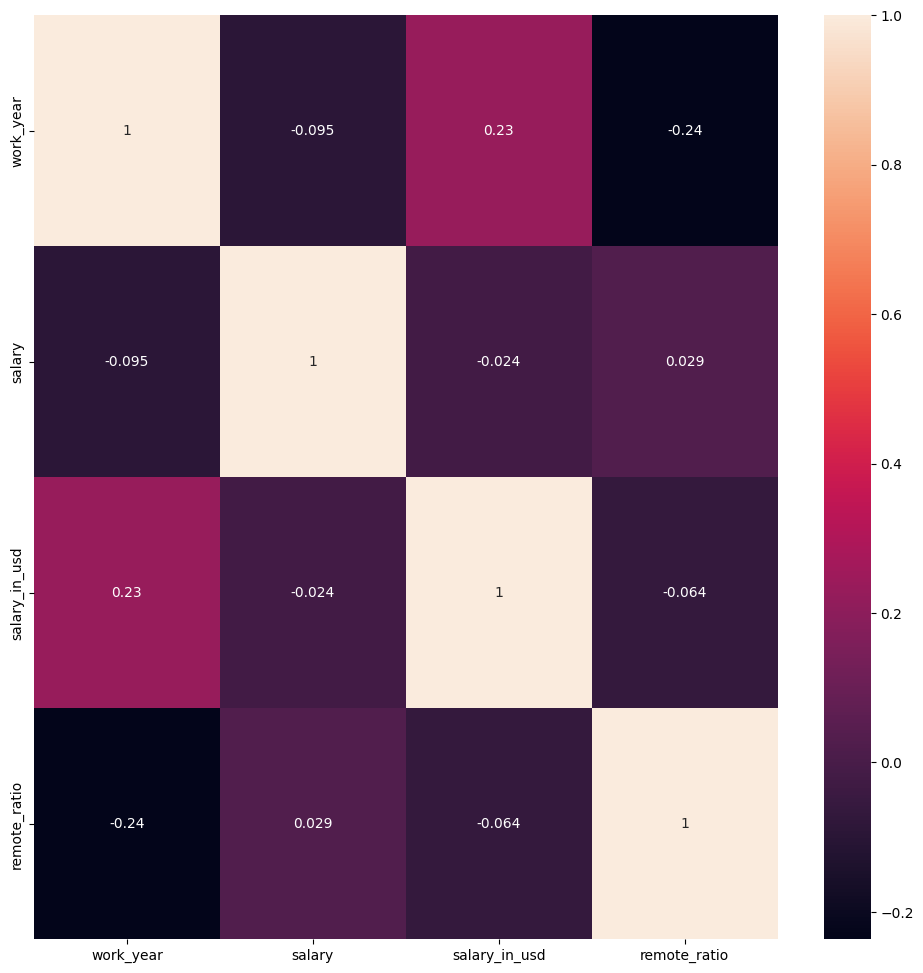

In [46]:
plt.figure(figsize = (12,12))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot =True)
plt.show()

#Other color maps
    #YlGnBu = yellow/greeen/blue
    #Blues
    #BuPu - blue/purple
    #Greens

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [47]:
from sklearn.model_selection import train_test_split
X = df['work_year']
y= df['salary_in_usd']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
x_train.head()






1649    2023
2094    2022
784     2023
2949    2022
3035    2022
Name: work_year, dtype: int64

In [32]:
y_train.head()

1649    196200
2094     52533
784     172200
2949    105000
3035     61566
Name: salary_in_usd, dtype: int64

In [33]:
X_test.head()

2148    SE
1044    SE
3321    SE
439     SE
3519    EX
Name: experience_level, dtype: object

In [51]:
import statsmodels.api as sm

#adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           8.32e-31
Time:                        17:41:13   Log-Likelihood:                -32690.
No. Observations:                2628   AIC:                         6.538e+04
Df Residuals:                    2626   BIC:                         6.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.039e+07   3.47e+06    -11.649      0.000   -4.72e+07   -3.36e+07
work_year   2.004e+04   1714.358     11.689      0.000    1.67e+04    2.34e+04
==============================================================================
Omnibus:                      272.256   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.402
Skew:                           0.700   Prob(JB):                    1.45e-106
Kurtosis:                       4.579   Cond. No.                     5.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Error Terms

Finally, plot your error terms!

C:\Users\saritha\AppData\Local\Temp\ipykernel_16568\1812015400.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


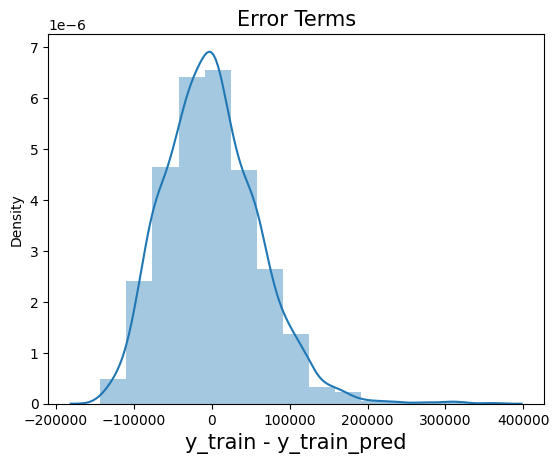

In [53]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(x_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.049
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Yes